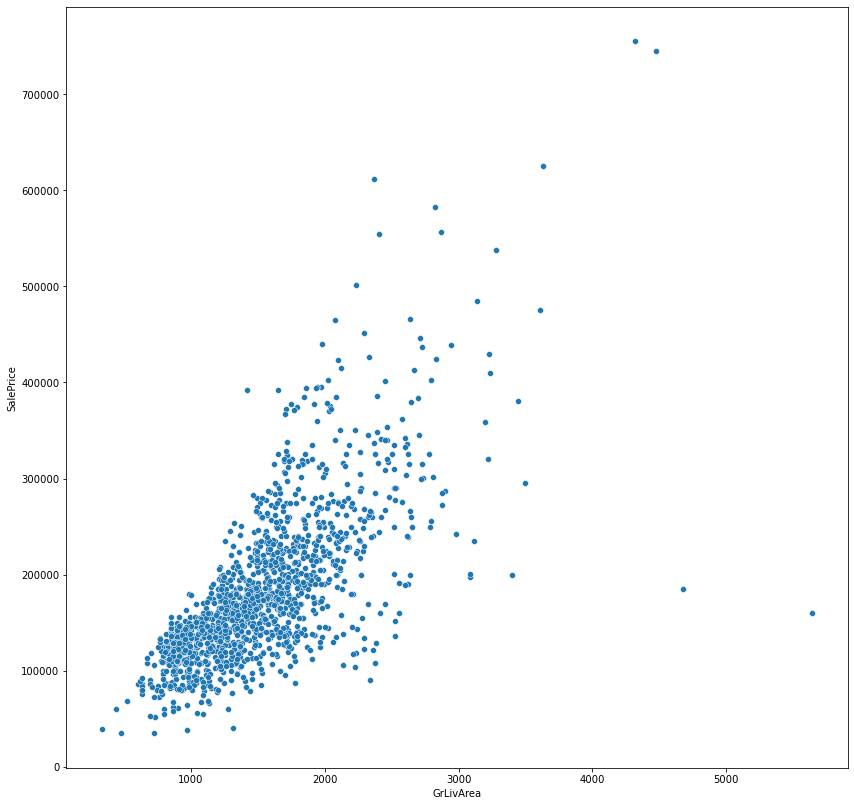

In [8]:
plt.figure(figsize = (14, 14))

sns.scatterplot(data = train_copy, x = 'GrLivArea', y = 'SalePrice')
plt.show()

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, norm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_absolute_error,mean_squared_error
pd.set_option('max_rows', 100)

In [120]:
train = pd.read_csv('./Data/house/train.csv')
test = pd.read_csv('./Data/house/test.csv')

print(train.shape)
print(test.shape)

train_copy = train
test_copy = test

(1460, 81)
(1459, 80)


In [121]:
# 이상치 2개 제거
print(train_copy.shape)
train_copy = train_copy[~((train_copy['SalePrice'] < 200000) & (train_copy['GrLivArea'] > 4000))]
print(train_copy.shape)

(1460, 81)
(1458, 81)


In [122]:
#total_df = pd.concat((train_copy, test_copy)).reset_index(drop = True)
total_df = train_copy.copy()
total_df.drop("SalePrice", axis = 1, inplace = True)
total_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [11]:
pd.set_option('max_rows', 80)

total_df.isnull().sum().sort_values(ascending = False)

PoolQC           2908
MiscFeature      2812
Alley            2719
Fence            2346
FireplaceQu      1420
LotFrontage       486
GarageYrBlt       159
GarageFinish      159
GarageQual        159
GarageCond        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
GarageCars          1
KitchenQual         1
BsmtFinSF1          1
SaleType            1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Exterior2nd         1
Exterior1st         1
GarageArea          1
Electrical          1
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
Id                  0
HalfBath            0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea  

In [123]:
total_df['PoolQC'] = total_df['PoolQC'].fillna('None')
total_df['MiscFeature'] = total_df['MiscFeature'].fillna('None')
total_df['Alley'] = total_df['Alley'].fillna('None')
total_df['Fence'] = total_df['Fence'].fillna('None')
total_df['FireplaceQu'] = total_df['FireplaceQu'].fillna('None')
total_df['MSSubClass'] = total_df['MSSubClass'].fillna('None')

# "땅면적LotFrontage" 변수 / 중요한 변수라고 판단
total_df['LotFrontage'] = total_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# "차고" 관련 변수 정리
## Categorical Features
total_df['GarageType'] = total_df['GarageType'].fillna('None')
total_df['GarageFinish'] = total_df['GarageFinish'].fillna('None')
total_df['GarageQual'] = total_df['GarageQual'].fillna('None')
total_df['GarageCond'] = total_df['GarageCond'].fillna('None')
## Numerical Features
total_df['GarageYrBlt'] = total_df['GarageYrBlt'].fillna(0)
total_df['GarageCars'] = total_df['GarageCars'].fillna(0)
total_df['GarageArea'] = total_df['GarageArea'].fillna(0)

# "지하실" 관련 변수 정리
## Categorical Features
total_df['BsmtQual'] = total_df['BsmtQual'].fillna('None')
total_df['BsmtCond'] = total_df['BsmtCond'].fillna('None')
total_df['BsmtExposure'] = total_df['BsmtExposure'].fillna('None')
total_df['BsmtFinType1'] = total_df['BsmtFinType1'].fillna('None')
total_df['BsmtFinType2'] = total_df['BsmtFinType2'].fillna('None')
## Numerical Features
total_df['BsmtFinSF1'] = total_df['BsmtFinSF1'].fillna(0)
total_df['BsmtFinSF2'] = total_df['BsmtFinSF2'].fillna(0)
total_df['BsmtUnfSF'] = total_df['BsmtUnfSF'].fillna(0)
total_df['TotalBsmtSF'] = total_df['TotalBsmtSF'].fillna(0)
total_df['BsmtFullBath'] = total_df['BsmtFullBath'].fillna(0)
total_df['BsmtHalfBath'] = total_df['BsmtHalfBath'].fillna(0)

# "석공Masonry" 관련 변수 정리
total_df['MasVnrType'] = total_df['MasVnrType'].fillna('None')
total_df['MasVnrArea'] = total_df['MasVnrArea'].fillna(0)

# "Electrical", "KitchenQual", "MSZoning", "Exterior1st", "Exterior2nd", "Functional" 변수는 최빈도 값으로 결측치 대체
total_df['Electrical'] = total_df['Electrical'].fillna(total_df['Electrical'].mode()[0])
total_df['MSZoning'] = total_df['MSZoning'].fillna(total_df['MSZoning'].value_counts().index[0])
total_df['KitchenQual'] = total_df['KitchenQual'].fillna(total_df['KitchenQual'].value_counts().index[0])
total_df['Exterior1st'] = total_df['Exterior1st'].fillna(total_df['Exterior1st'].value_counts().index[0])
total_df['Exterior2nd'] = total_df['Exterior2nd'].fillna(total_df['Exterior2nd'].value_counts().index[0])
total_df['SaleType'] = total_df['SaleType'].fillna(total_df['SaleType'].value_counts().index[0])
total_df['Functional'] = total_df['Functional'].fillna(total_df['Functional'].value_counts().index[0])

# "Utilities" 변수는 삭제
total_df = total_df.drop(['Utilities'], axis = 1)

total_df.isnull().sum().sort_values(ascending = False)

Id               0
BedroomAbvGr     0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
HalfBath         0
GarageFinish     0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageYrBlt      0
GarageCars       0
CentralAir       0
PoolArea         0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolQC           0
ScreenPorch      0
GarageArea       0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
Electrical       0
HeatingQC        0
MSSubClass       0
LandSlope        0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LotConfig        0
YearRemodAdd     0
LandContour      0
LotShape    

In [124]:
# 데이터 타입이 숫자형임에도 불구하고 숫자형 데이터로 보면 안되는 변수들 정리
## ex) 건물이 팔린 연 정보, 건물이 팔린 월 정보...

total_df['MSSubClass'] = total_df['MSSubClass'].astype('str')
total_df['OverallCond'] = total_df['OverallCond'].astype('str')
total_df['YrSold'] = total_df['YrSold'].astype('str')
total_df['MoSold'] = total_df['MoSold'].astype('str')

total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   object 
 2   MSZoning       1458 non-null   object 
 3   LotFrontage    1458 non-null   float64
 4   LotArea        1458 non-null   int64  
 5   Street         1458 non-null   object 
 6   Alley          1458 non-null   object 
 7   LotShape       1458 non-null   object 
 8   LandContour    1458 non-null   object 
 9   LotConfig      1458 non-null   object 
 10  LandSlope      1458 non-null   object 
 11  Neighborhood   1458 non-null   object 
 12  Condition1     1458 non-null   object 
 13  Condition2     1458 non-null   object 
 14  BldgType       1458 non-null   object 
 15  HouseStyle     1458 non-null   object 
 16  OverallQual    1458 non-null   int64  
 17  OverallCond    1458 non-null   object 
 18  YearBuil

In [125]:
columns = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for cols in columns:
    le = LabelEncoder()
    le.fit(list(total_df[cols].values))
    total_df[cols] = le.transform(list(total_df[cols].values))

    
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int32  
 2   MSZoning       1458 non-null   object 
 3   LotFrontage    1458 non-null   float64
 4   LotArea        1458 non-null   int64  
 5   Street         1458 non-null   int32  
 6   Alley          1458 non-null   int32  
 7   LotShape       1458 non-null   int32  
 8   LandContour    1458 non-null   object 
 9   LotConfig      1458 non-null   object 
 10  LandSlope      1458 non-null   int32  
 11  Neighborhood   1458 non-null   object 
 12  Condition1     1458 non-null   object 
 13  Condition2     1458 non-null   object 
 14  BldgType       1458 non-null   object 
 15  HouseStyle     1458 non-null   object 
 16  OverallQual    1458 non-null   int64  
 17  OverallCond    1458 non-null   int32  
 18  YearBuil

In [126]:
# 새로운 변수 만들기
total_df['TotalSF'] = total_df['TotalBsmtSF'] + total_df['1stFlrSF'] + total_df['2ndFlrSF']

In [127]:
numeric_feat = total_df.dtypes[total_df.dtypes != 'object'].index

skewed_feat = total_df[numeric_feat].apply(lambda x: skew(x)).sort_values(ascending = False)
skew_df = pd.DataFrame({'Skew' : skewed_feat})
skew_df

,Skew
MiscVal,24.434913
PoolArea,15.932532
LotArea,12.560986
3SsnPorch,10.286510
LowQualFinSF,8.995688
LandSlope,4.805032
KitchenAbvGr,4.480268
BsmtFinSF2,4.247550
ScreenPorch,4.114690
BsmtHalfBath,4.095895


In [128]:
skew_df = skew_df[abs(skew_df) > 0.75]
skewed_features = skew_df.index

total_df[skewed_features] = np.log1p(total_df[skewed_features])

total_df = pd.get_dummies(total_df)
print(total_df.shape)

(1458, 221)


In [129]:
total_df.drop(['Id'], axis = 1, inplace = True)
total_df.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.302585,4.189655,9.042040,0.693147,0.693147,1.386294,0.0,2.079442,1.609438,7.602900,...,0,0,0,1,0,0,0,0,1,0
1,1.609438,4.394449,9.169623,0.693147,0.693147,1.386294,0.0,1.945910,2.079442,7.589336,...,0,0,0,1,0,0,0,0,1,0
2,2.302585,4.234107,9.328212,0.693147,0.693147,0.000000,0.0,2.079442,1.609438,7.601902,...,0,0,0,1,0,0,0,0,1,0
3,2.397895,4.110874,9.164401,0.693147,0.693147,0.000000,0.0,2.079442,1.609438,7.557995,...,0,0,0,1,1,0,0,0,0,0
4,2.302585,4.442651,9.565284,0.693147,0.693147,0.000000,0.0,2.197225,1.609438,7.601402,...,0,0,0,1,0,0,0,0,1,0


In [130]:
X = total_df
y = train_copy['SalePrice']

#X_test = test.drop(['Id'], axis = 1)

In [131]:
print(X.shape, y.shape)

(1458, 220) (1458,)


In [132]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 111)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1166, 220) (292, 220) (1166,) (292,)


In [142]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42, learning_rate=0.01, n_estimators=1000, subsample=0.8, max_features=0.8, max_depth=7)
xgb.fit(x_train, y_train)

[01:33:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_features" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=7,
             max_features=0.8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=12,
             num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [145]:
xgb_pred = xgb.predict(x_test)
len(xgb_pred)

292

In [81]:
model = Sequential()

model.add(Dense(x_train.shape[1], activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer = Adam(0.00001),
              loss = 'mse',
             metrics = ['mae'])

hist = model.fit(x_train.values, y_train.values,
                validation_data = (x_test.values, y_test.values),
                 batch_size = 1,
                 epochs = 100)

Epoch 1/100
1166/1166 [==============================] - 7s 4ms/step - loss: 39524712448.0000 - mae: 181544.5156 - val_loss: 37061484544.0000 - val_mae: 178211.2812
Epoch 2/100
1166/1166 [==============================] - 5s 4ms/step - loss: 39105998848.0000 - mae: 180402.5000 - val_loss: 35883986944.0000 - val_mae: 174932.3594
Epoch 3/100
1166/1166 [==============================] - 5s 4ms/step - loss: 35693551616.0000 - mae: 170780.0938 - val_loss: 29528492032.0000 - val_mae: 156061.7188
Epoch 4/100
1166/1166 [==============================] - 5s 4ms/step - loss: 25273524224.0000 - mae: 136698.7656 - val_loss: 16067008512.0000 - val_mae: 106001.0859
Epoch 5/100
1166/1166 [==============================] - 5s 4ms/step - loss: 11952721920.0000 - mae: 78450.3906 - val_loss: 6038126080.0000 - val_mae: 53250.8516
Epoch 6/100
1166/1166 [==============================] - 5s 4ms/step - loss: 6217123840.0000 - mae: 50711.3047 - val_loss: 4361284096.0000 - val_mae: 49204.2930
Epoch 7/100
1166/

In [137]:
train_pred = model.predict(x_train).flatten()
train_pred

array([166799.58 , 167336.92 , 119907.125, ..., 227098.4  ,  96858.92 ,
       317269.9  ], dtype=float32)

In [140]:
len(train_pred) + len(test_pred)

1458

In [141]:
len(test)

1459

In [147]:
train_df = pd.read_csv('./Data/house/train.csv')
test_df = pd.read_csv('./Data/house/test.csv')

In [148]:
#Lets take all the columns which can help in predicting the sale price based on corelation cofficient.
numericalCols=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt',
     'MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','HalfBath','LotArea','BsmtFullBath','BsmtUnfSF',
     'BedroomAbvGr','ScreenPorch','PoolArea','KitchenAbvGr','EnclosedPorch','OverallCond']
y=train_df['SalePrice']
#numericalCols=list(train_df.select_dtypes(include=['int64','float64']).columns.drop(['Id','SalePrice']))

#Please refer data_description.txt file to understand the categorical columns.
categoricalCols=['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
'RoofStyle','RoofMatl','Exterior1st','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
'BsmtFinType2','Electrical','Heating','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
                 'PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition','MSSubClass']
#categoricalCols=list(train_df.select_dtypes(include=['object']).columns)
#Putting train and test dataset in an array so that data cleaning will be easy.
dataset=[train_df,test_df]

In [149]:
for data in dataset:
    print('---filling null value')
    #data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].median())
    data.loc[data.LotFrontage.isnull(),'LotFrontage']=data.LotFrontage.median()
    #I am converting GarageYrBlt column to feature column. If year is present then its 1 else 0
    data['GarageYrBlt']= data['GarageYrBlt'].apply(lambda x: 1 if pd.notnull(x) else 0)
    #I am assigning the null value to 0 for MasVnrArea.
    data['MasVnrArea']=data['MasVnrArea'].apply(lambda x: x if pd.notnull(x) else 0)
    #Please refer data_description.txt file to understand with what value we should replace nan in each categorical columns.
    data['Alley']=data['Alley'].apply(lambda x: x if pd.notnull(x) else 'No Alley')
    data['MasVnrType']=data['MasVnrType'].apply(lambda x: x if pd.notnull(x) else 'None')
    data['BsmtQual']=data['BsmtQual'].apply(lambda x: x if pd.notnull(x) else 'No')
    data['BsmtCond']=data['BsmtCond'].apply(lambda x: x if pd.notnull(x) else 'No')
    data['BsmtExposure']=data['BsmtExposure'].apply(lambda x: x if pd.notnull(x) else 'No')
    data['BsmtFinType1']=data['BsmtFinType1'].apply(lambda x: x if pd.notnull(x) else 'No')
    data['BsmtFinType2']=data['BsmtFinType2'].apply(lambda x: x if pd.notnull(x) else 'No')
    data['Electrical']=data['Electrical'].fillna(data['Electrical'].mode()[0])
    data['FireplaceQu']=data['FireplaceQu'].apply(lambda x: x if pd.notnull(x) else 'No')
    data['GarageType']=data['GarageType'].apply(lambda x: x if pd.notnull(x) else 'No')
    data['GarageFinish']=data['GarageFinish'].apply(lambda x: x if pd.notnull(x) else 'No')
    data['GarageQual']=data['GarageQual'].apply(lambda x: x if pd.notnull(x) else 'No')
    data['GarageCond']=data['GarageCond'].apply(lambda x: x if pd.notnull(x) else 'No')
    data['PoolQC']=data['PoolQC'].apply(lambda x: x if pd.notnull(x) else 'No')
    data['Fence']=data['Fence'].apply(lambda x: x if pd.notnull(x) else 'No')
    data['MiscFeature']=data['MiscFeature'].apply(lambda x: x if pd.notnull(x) else 'No') 

---filling null value
---filling null value


In [150]:
#Lets normalize it.
for data in dataset:
    data.replace({'Alley':{'Grvl':0,'No Alley':1,'Pave':0},
                 'BldgType':{'1Fam':1,'2fmCon':0,'Duplex':0,'TwnhsE':0,'Twnhs':0},
                 'RoofStyle':{'Flat':0,'Gable':1,'Gambrel':0,'Hip':1,'Mansard':0,'Shed':0},
                 'BsmtQual':{'Ex':2,'Fa':0,'Gd':1,'No':0,'TA':1},
                 'LotShape':{'IR2':0,'IR3':0,'Reg':1,'IR1':2},
                 'LandContour':{'Bnk':0,'HLS':1,'Low':0,'Lvl':2},
                  'LandSlope':{'Gtl':1,'Mod':0,'Sev':0},
                  'ExterQual':{'Fa':0,'Gd':1,'TA':1,'Ex':2},
                  'Electrical':{'FuseA':0,'FuseF':0,'FuseP':0,'Mix':0,'SBrkr':1},
                  'Heating':{'Floor':0,'GasW':0,'Grav':0,'OthW':0,'Wall':0,'GasA':1},
                  'CentralAir':{'N':0,'Y':1},
                  'KitchenQual':{'Ex':2,'Fa':0,'Gd':1,'No':0,'TA':1},
                  'Functional':{'Maj1':0,'Maj2':0,'Min1':0,'Min2':0,'Mod':0,'Sev':0,'Typ':1},
                  'GarageQual':{'Ex':2,'Fa':0,'Gd':1,'No':0,'Po':0,'TA':1},
                 },inplace=True)

In [151]:
feaCols=['Alley','BsmtQual']

In [152]:
train_df=train_df.drop(train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<300000)].index)

In [153]:
#So after analysing the plots I selected the below columns.
featureCols=['MSZoning','Neighborhood','Condition1','MSSubClass','Foundation']
#Lets take out all the selected numerial columns and feature columns from train dataset.
trainData=train_df[numericalCols+featureCols+feaCols]
#Lets do feature scaling on categorical columns for train data.
trainData=pd.get_dummies(trainData,columns=featureCols+feaCols,drop_first=True)

#Lets take out all the selected numerial columns and feature columns from test dataset.
testData=test_df[numericalCols+featureCols+feaCols]
#Lets do feature scaling on categorical columns for test data.
testData=pd.get_dummies(testData,columns=featureCols+feaCols,drop_first=True)

y=train_df.SalePrice
X=trainData

In [154]:
test_df.loc[test_df['MSSubClass'] == 150, 'MSSubClass'] = 160

In [155]:
#We need to do the below step again
trainData=train_df[numericalCols+featureCols+feaCols]
trainData=pd.get_dummies(trainData,columns=featureCols+feaCols,drop_first=True)
testData=test_df[numericalCols+featureCols+feaCols]
testData=pd.get_dummies(testData,columns=featureCols+feaCols,drop_first=True)

y=train_df.SalePrice
X=trainData

In [156]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)
y_train=np.log1p(y_train)

In [157]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1166, 86) (292, 86)
(1166,) (292,)


In [160]:
xmodel=XGBRegressor(n_estimators=2200,learning_rate=0.035,n_jobs=-1,max_depth=2)
xmodel.fit(x_train,y_train,)
xpred=xmodel.predict(x_test)
print(mean_absolute_error(y_test,np.expm1(xpred)))

13150.593843642979


In [163]:
test_pred = np.expm1(xmodel.predict(testData))
test_pred

array([114885.945, 161109.42 , 192301.02 , ..., 192566.2  , 111945.92 ,
       233526.11 ], dtype=float32)

In [165]:
testData.shape

(1459, 86)

In [166]:
1166 + 292

1458

In [167]:
sub=pd.DataFrame({'Id':test_df.Id,'SalePrice':test_pred})
sub.to_csv('Submission.csv',index=False)